# Dogs vs. Cats

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [34]:
train_dir = 'C:\\Users\\SON\\.keras\\datasets\\cats_and_dogs_filtered\\train'
validation_dir = 'C:\\Users\\SON\\.keras\\datasets\\cats_and_dogs_filtered\\validation'


In [35]:
train_dir

'C:\\Users\\SON\\.keras\\datasets\\cats_and_dogs_filtered\\train'

In [36]:
train_scab_dir = os.path.join(train_dir, 'Apple___Apple_scab')  # directory with our training cat pictures
train_black_dir = os.path.join(train_dir, 'Apple___Black_rot')  # directory with our training dog pictures
train_rust_dir = os.path.join(train_dir, 'Apple___Cedar_apple_rust')  # directory with our training cat pictures
train_healthy_dir = os.path.join(train_dir, 'Apple___healthy')  # directory with our training dog pictures

validation_scab_dir = os.path.join(validation_dir, 'Apple___Apple_scab')  # directory with our training cat pictures
validation_black_dir = os.path.join(validation_dir, 'Apple___Black_rot')  # directory with our training dog pictures
validation_rust_dir = os.path.join(validation_dir, 'Apple___Cedar_apple_rust')  # directory with our training cat pictures
validation_healthy_dir = os.path.join(validation_dir, 'Apple___healthy')  # directory with our training dog pictures



In [37]:
num_scab_tr = len(os.listdir(train_scab_dir))
num_black_tr = len(os.listdir(train_black_dir))
num_rust_tr = len(os.listdir(train_rust_dir))
num_healthy_tr = len(os.listdir(train_healthy_dir))

num_scab_val = len(os.listdir(validation_scab_dir))
num_black_val = len(os.listdir(validation_black_dir))
num_rust_val = len(os.listdir(validation_rust_dir))
num_healthy_val = len(os.listdir(validation_healthy_dir))


total_train = num_scab_tr + num_black_tr+num_rust_tr+num_healthy_tr
total_val = num_scab_val + num_black_val+num_rust_val+num_healthy_val


In [38]:

print("Total training images:", total_train)
print("Total validation images:", total_val)


Total training images: 10149
Total validation images: 2537


In [88]:
batch_size = 128
epochs = 5
IMG_HEIGHT = 224
IMG_WIDTH = 224


In [89]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [90]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 10148 images belonging to 4 classes.


In [42]:
train_dir

'C:\\Users\\SON\\.keras\\datasets\\cats_and_dogs_filtered\\train'

In [108]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')


Found 2536 images belonging to 4 classes.


In [109]:
sample_training_images, _ = next(train_data_gen)

In [110]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


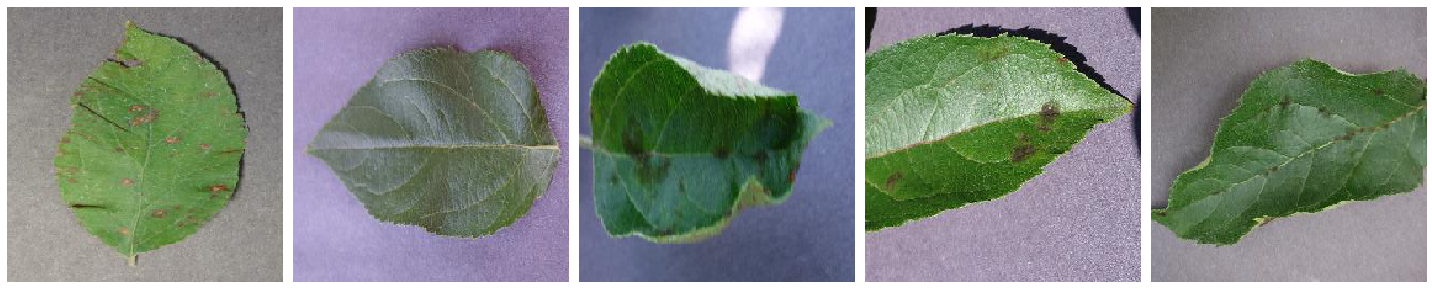

In [111]:
plotImages(sample_training_images[:5])

In [102]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


In [101]:
from tensorflow.keras.layers import MaxPool2D

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(150,150,3), kernel_size=(11,11), strides=(4,4), padding="valid", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(units = 9216, activation = "relu"))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = "relu"))

# 3rd Fully Connected Layer
model.add(Dense(4096, activation = "relu"))

# Output Layer
model.add(Dense(2, activation = "softmax")) #As we have two classes


TypeError: The added layer must be an instance of class Layer. Found: <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000018578453208>

In [116]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.layers import MaxPool2D


# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1, activation = 'softmax'))
classifier.summary()


# Compiling the CNN
# classifier.compile(optimizer='adam',
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])


# Compiling the CNN
# classifier.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
#                    loss='sparse_categorical_crossentropy',
#                    metrics=['accuracy'])


classifier.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_58 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_59 (Batc (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 6, 6, 384)       

In [83]:
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.optimizers import Adam


model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])


In [117]:
history = classifier.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/5


ValueError: You are passing a target array of shape (128, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

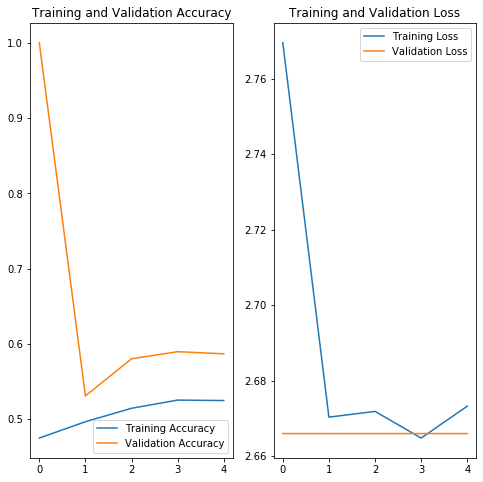

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [70]:
import keras